# Proyecto Final

## 1.- Businnes Understanding

## 2.- Data Understanding

Importamos las librerias

In [1]:
#Análisis exploratorio de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import missingno as msno

#Clúster
import random 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
from sklearn.preprocessing import StandardScaler

#Regresión

#Clasificación

c:\users\pcs\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Cargamos los datos

In [2]:
df = pd.read_csv("AirBnb_Mexico.csv")

Exploración de los datos

In [3]:
df.shape

(19030, 15)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14714,Private room c/ bathroom . Colonia Juarez.,57785,Diego,Cuauhtémoc,19.43035,-99.15511,Private room,478,2,0,NaN,NaN,2,327
1,22787,"Sunny suite w/ queen size bed, inside boutique...",87973,Diego,Cuauhtémoc,19.44076,-99.16324,Private room,1969,1,57,27/05/2019,0.52,9,355
2,33681,Couple of Rooms,145672,Edubiel,Tlalpan,19.27215,-99.21848,Private room,1740,1,0,NaN,NaN,1,365
3,35797,Villa Dante,153786,Dici,Cuajimalpa de Morelos,19.38399,-99.27335,Entire home/apt,3823,1,0,NaN,NaN,2,363
4,44616,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,Cuauhtémoc,19.41006,-99.17645,Private room,1893,1,39,02/05/2019,0.42,10,334


In [5]:
variables = df.columns.values.tolist()
variables

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
df.columns = ['ID', 'RAZONSOCIAL', 'ID_HOST', 'HOST_NOMBRE', 'DELEGACION', 'LAT',
       'LON', 'TIPO_HABITACION', 'PRECIO', 'MIN_NOCHES',
       'N_COMENTARIOS', 'ULTIMO_COMENTARIO', 'COMENTARIOSXMES',
       'N_VECES_HOST_LISTADO', 'DISPONIBILIDAD']

In [8]:
df.isnull().any().any()

True

<AxesSubplot:>

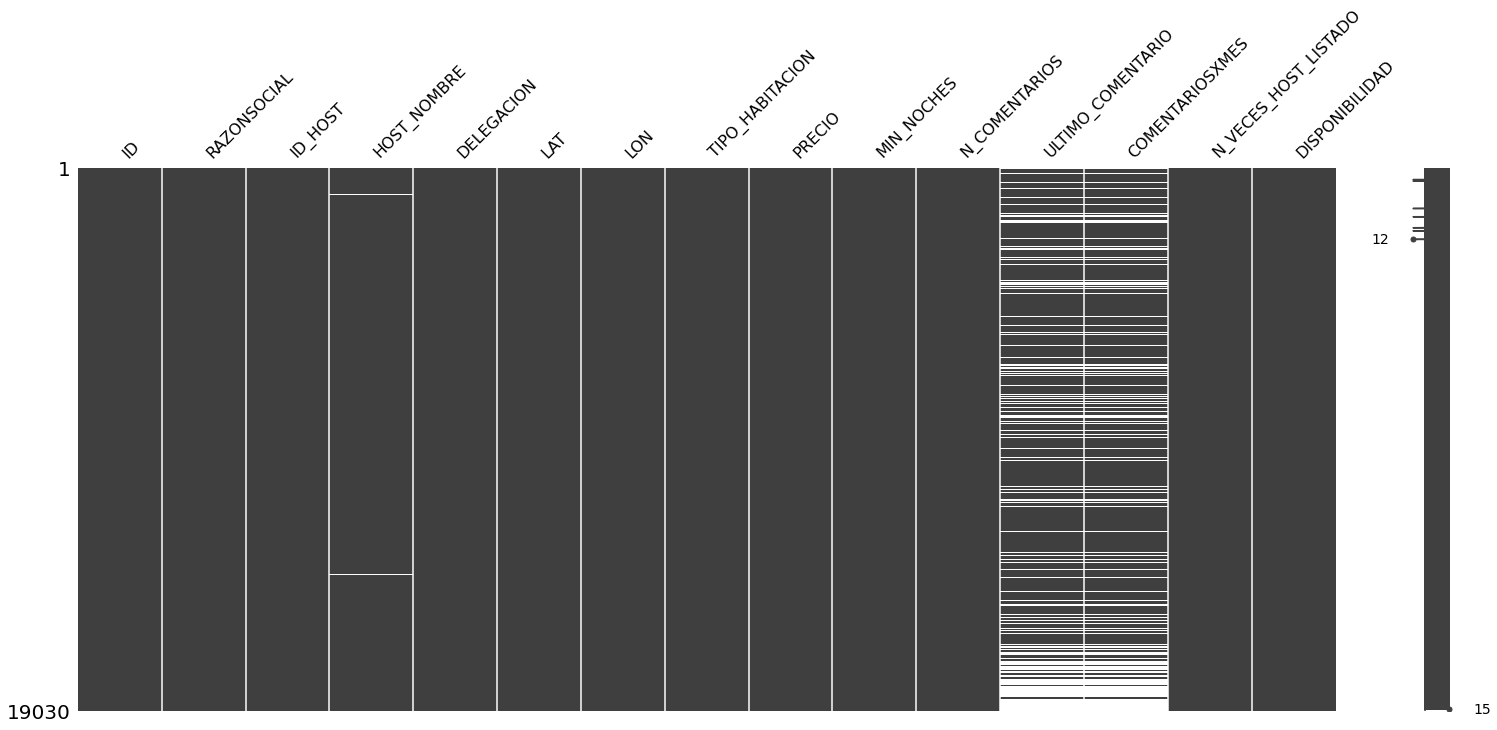

In [9]:
msno.matrix(df)

In [10]:
df.agg(['count', 'size', 'nunique'])

,ID,RAZONSOCIAL,ID_HOST,HOST_NOMBRE,DELEGACION,LAT,LON,TIPO_HABITACION,PRECIO,MIN_NOCHES,N_COMENTARIOS,ULTIMO_COMENTARIO,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD
count,19030,19017,19030,18968,19030,19030,19030,19030,19030,19030,19030,14222,14222,19030,19030
size,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030,19030
nunique,19030,18542,12208,3898,16,10282,8655,3,364,62,268,1025,847,34,366


<AxesSubplot:>

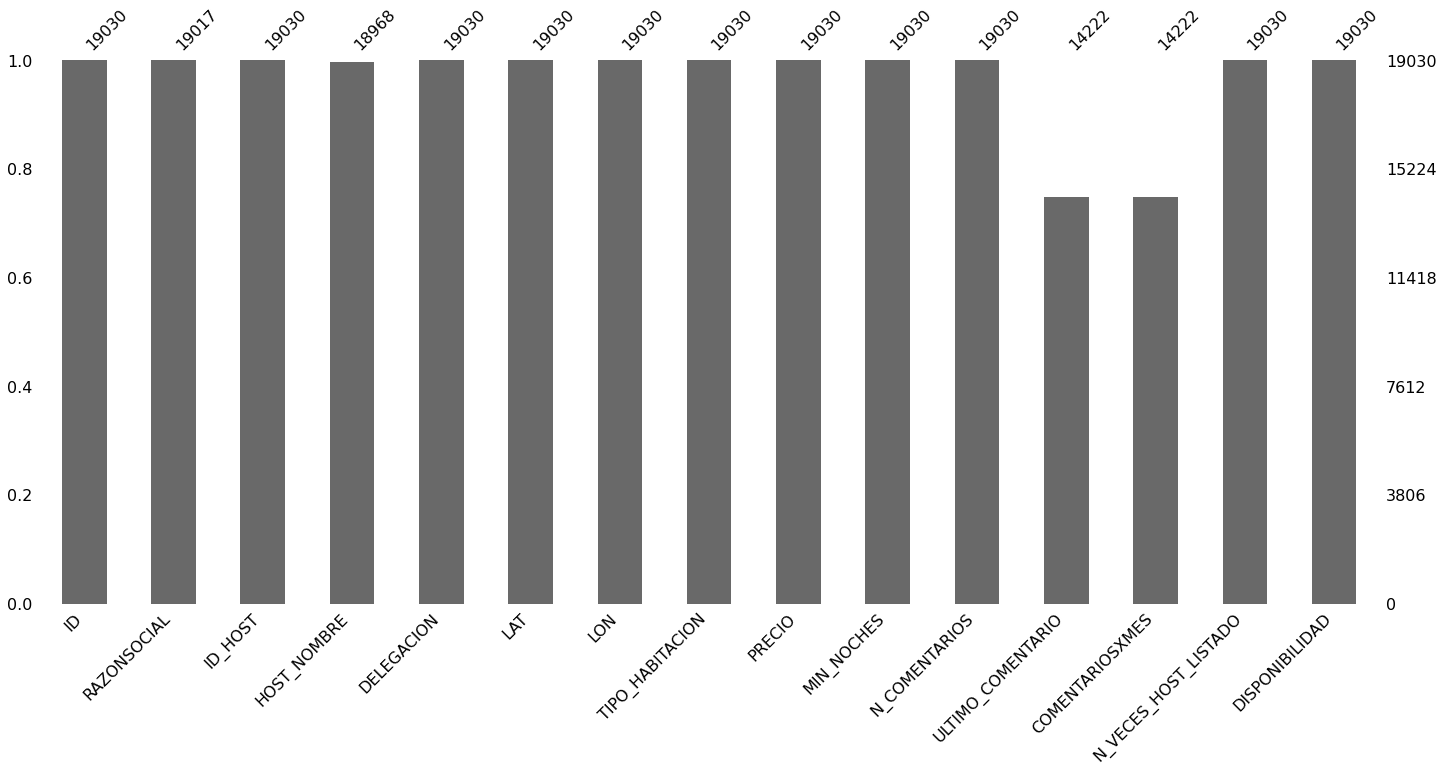

In [11]:
msno.bar(df)

In [12]:
df.columns[df.isnull().any()].tolist()

['RAZONSOCIAL', 'HOST_NOMBRE', 'ULTIMO_COMENTARIO', 'COMENTARIOSXMES']

In [13]:
df_copia = df.copy()
df_copia.shape

(19030, 15)

In [14]:
df = df.dropna()
df.shape

(14154, 15)

<AxesSubplot:>

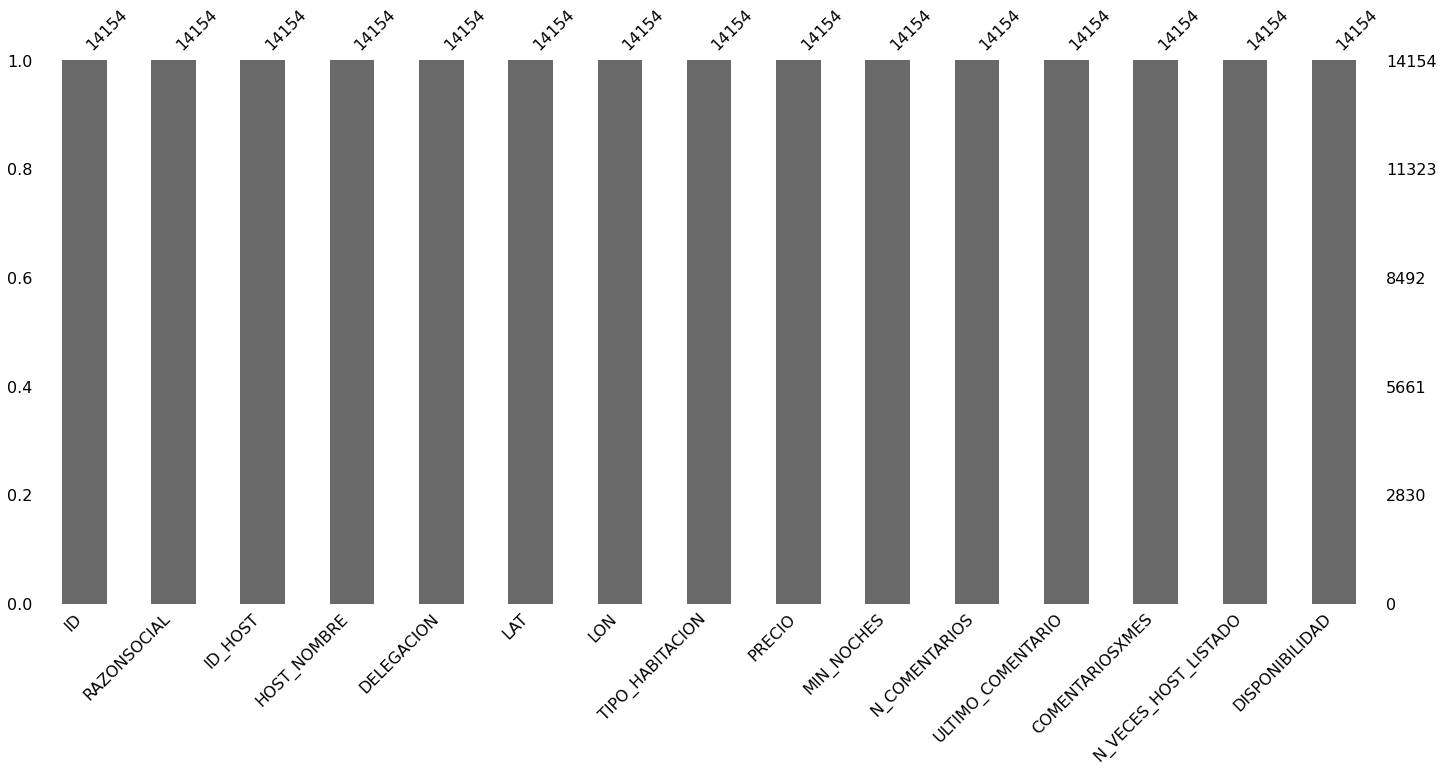

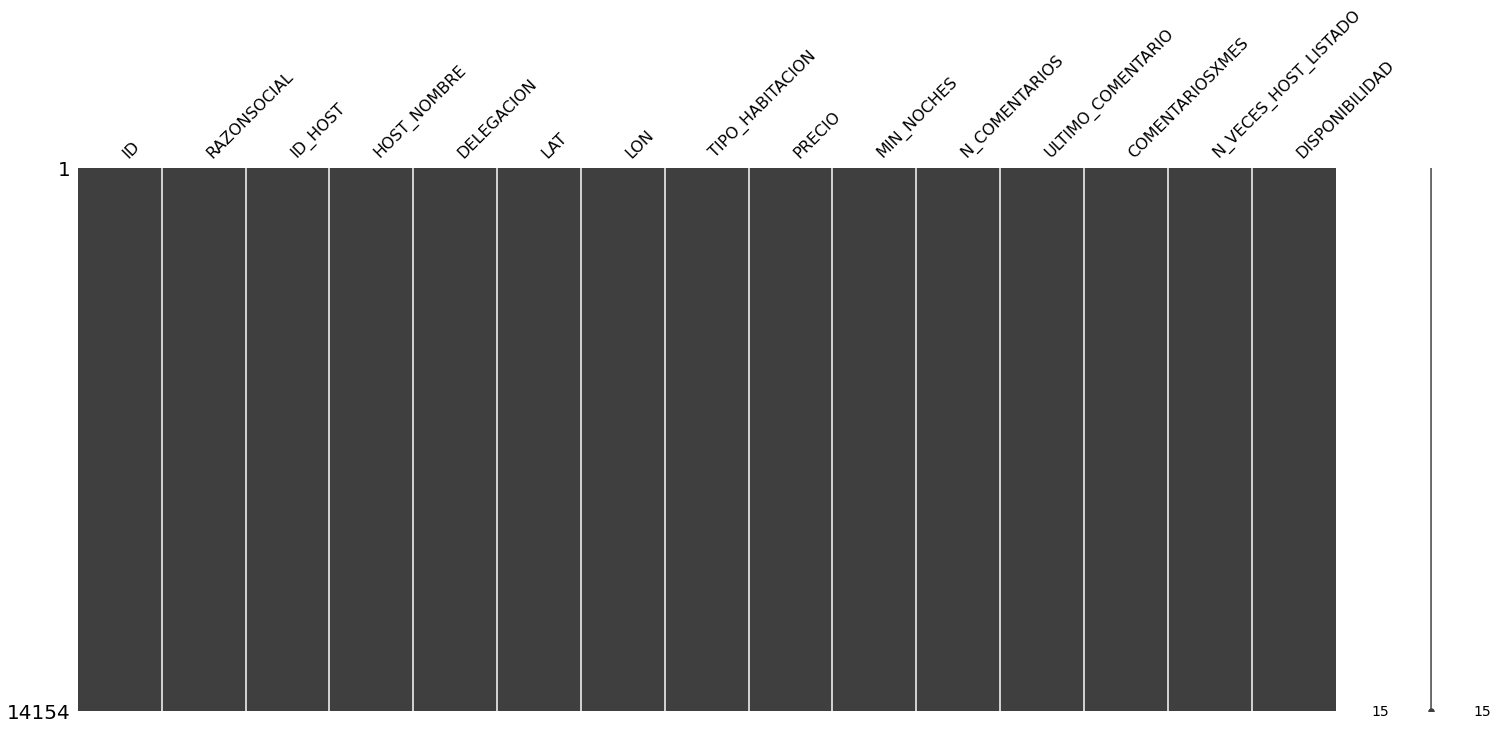

In [15]:
msno.bar(df)
msno.matrix(df)

Variables númericas

In [17]:
df[["PRECIO","MIN_NOCHES","N_COMENTARIOS","ULTIMO_COMENTARIO","COMENTARIOSXMES","N_VECES_HOST_LISTADO","DISPONIBILIDAD"]].describe()

,PRECIO,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD
count,14154.000000,14154.000000,14154.000000,14154.000000,14154.000000,14154.000000
mean,1058.935001,2.578847,26.883355,1.697628,4.234068,214.174438
std,2492.151766,13.966202,39.395254,1.764299,6.858955,130.937909
min,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,401.000000,1.000000,3.000000,0.410000,1.000000,89.000000
50%,707.000000,2.000000,11.000000,1.060000,2.000000,221.000000
75%,1223.000000,2.000000,34.000000,2.400000,4.000000,346.000000
max,191170.000000,1000.000000,470.000000,15.810000,45.000000,365.000000


Text(0.5, 1.0, 'FRECUENCIA POR PRECIO')

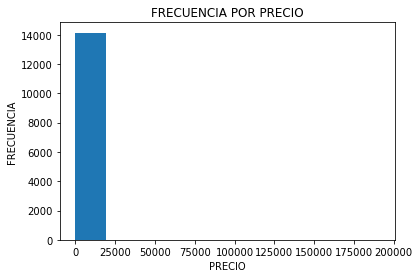

In [18]:
mpl.hist(df['PRECIO'])
mpl.xlabel('PRECIO')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR PRECIO')

Text(0.5, 1.0, 'FRECUENCIA POR MIN_NOCHES')

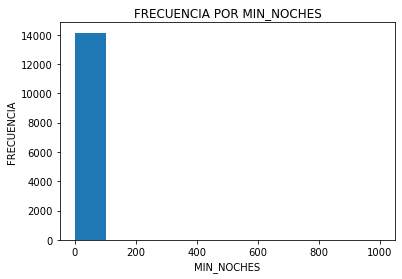

In [19]:
mpl.hist(df['MIN_NOCHES'])
mpl.xlabel('MIN_NOCHES')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR MIN_NOCHES')

Text(0.5, 1.0, 'FRECUENCIA POR N_COMENTARIOS')

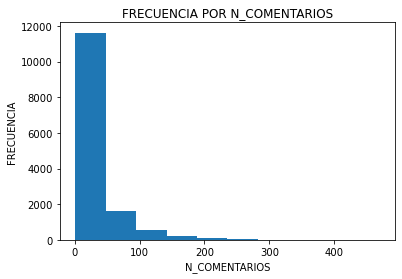

In [20]:
mpl.hist(df['N_COMENTARIOS'])
mpl.xlabel('N_COMENTARIOS')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR N_COMENTARIOS')

Text(0.5, 1.0, 'FRECUENCIA POR COMENTARIOSXMES')

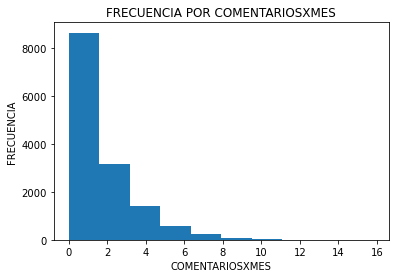

In [21]:
mpl.hist(df['COMENTARIOSXMES'])
mpl.xlabel('COMENTARIOSXMES')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR COMENTARIOSXMES')

Text(0.5, 1.0, 'FRECUENCIA POR N_VECES_HOST_LISTADO')

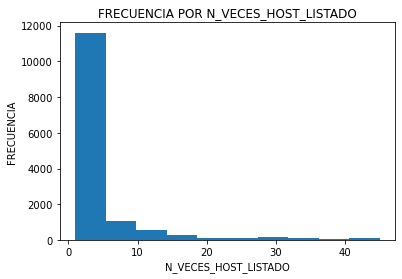

In [22]:
mpl.hist(df['N_VECES_HOST_LISTADO'])
mpl.xlabel('N_VECES_HOST_LISTADO')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR N_VECES_HOST_LISTADO')

Text(0.5, 1.0, 'FRECUENCIA POR DISPONIBILIDAD')

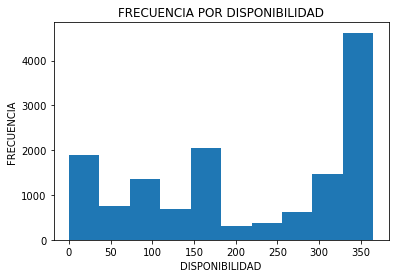

In [23]:
mpl.hist(df['DISPONIBILIDAD'])
mpl.xlabel('DISPONIBILIDAD')
mpl.ylabel('FRECUENCIA')
mpl.title('FRECUENCIA POR DISPONIBILIDAD')

<AxesSubplot:xlabel='PRECIO', ylabel='DELEGACION'>

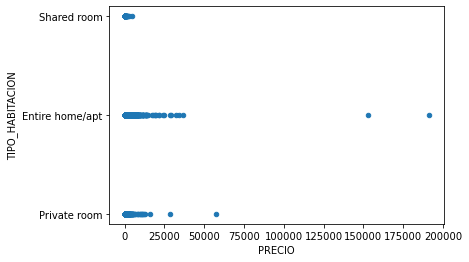

c:\users\pcs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\pcs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


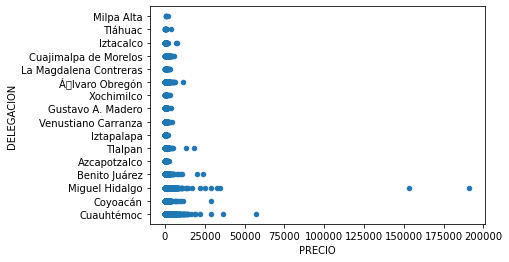

In [24]:
df.plot(kind='scatter',x='PRECIO',y='TIPO_HABITACION')
df.plot(kind='scatter',x='PRECIO',y='DELEGACION')

Variables categóricas

In [25]:
df['TIPO_HABITACION'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [26]:
df['TIPO_HABITACION'].value_counts()

Entire home/apt    7684
Private room       6280
Shared room         190
Name: TIPO_HABITACION, dtype: int64

In [27]:
df['DELEGACION'].unique()

array(['Cuauhtémoc', 'Coyoacán', 'Miguel Hidalgo', 'Benito Juárez',
       'Azcapotzalco', 'Tlalpan', 'Iztapalapa', 'Venustiano Carranza',
       'Gustavo A. Madero', 'Xochimilco', 'Á\x81lvaro Obregón',
       'La Magdalena Contreras', 'Cuajimalpa de Morelos', 'Iztacalco',
       'Tláhuac', 'Milpa Alta'], dtype=object)

In [28]:
df['DELEGACION'].value_counts()

Cuauhtémoc                6092
Miguel Hidalgo            2281
Benito Juárez             2221
Coyoacán                  1176
Álvaro Obregón            589
Tlalpan                    504
Cuajimalpa de Morelos      284
Venustiano Carranza        261
Gustavo A. Madero          181
Iztacalco                  169
Azcapotzalco               132
Iztapalapa                 105
La Magdalena Contreras      87
Xochimilco                  52
Tláhuac                     15
Milpa Alta                   5
Name: DELEGACION, dtype: int64

In [31]:
df[["ID","DELEGACION", "TIPO_HABITACION"]].groupby(["DELEGACION", "TIPO_HABITACION"]).count()

ID
DELEGACION             TIPO_HABITACION      
Azcapotzalco           Entire home/apt    47
                       Private room       83
                       Shared room         2
Benito Juárez          Entire home/apt  1022
                       Private room     1176
                       Shared room        23
Coyoacán               Entire home/apt   434
                       Private room      719
                       Shared room        23
Cuajimalpa de Morelos  Entire home/apt   162
                       Private room      119
                       Shared room         3
Cuauhtémoc             Entire home/apt  3781
                       Private room     2231
                       Shared room        80
Gustavo A. Madero      Entire home/apt    56
                       Private room      120
                       Shared room         5
Iztacalco              Entire home/apt    78
                       Private room       83
                       Shared room         8
Iztapalapa             Entire home/apt    28
                       Private room       74
                       Shared room         3
La Magdalena Contreras Entire home/apt    36
                       Private room       51
Miguel Hidalgo         Entire home/apt  1440
                       Private room      822
                       Shared room        19
Milpa Alta             Entire home/apt     3
                       Private room        2
Tlalpan                Entire home/apt   174
                       Private room      321
                       Shared room         9
Tláhuac                Entire home/apt     6
                       Private room        8
                       Shared room         1
Venustiano Carranza    Entire home/apt   123
                       Private room      127
                       Shared room        11
Xochimilco             Entire home/apt    22
                       Private room       30
Álvaro Obregón        Entire home/apt   272
                       Private room      314
                       Shared room         3

In [82]:
#df.groupby(["DELEGACION", "TIPO_HABITACION"])[["N_COMENTARIOS", "COMENTARIOSXMES"]].count()

N_COMENTARIOS  COMENTARIOSXMES
DELEGACION             TIPO_HABITACION                                
Azcapotzalco           Entire home/apt             47               47
                       Private room                83               83
                       Shared room                  2                2
Benito Juárez          Entire home/apt           1022             1022
                       Private room              1176             1176
                       Shared room                 23               23
Coyoacán               Entire home/apt            434              434
                       Private room               719              719
                       Shared room                 23               23
Cuajimalpa de Morelos  Entire home/apt            162              162
                       Private room               119              119
                       Shared room                  3                3
Cuauhtémoc             Entire home/apt           3781             3781
                       Private room              2231             2231
                       Shared room                 80               80
Gustavo A. Madero      Entire home/apt             56               56
                       Private room               120              120
                       Shared room                  5                5
Iztacalco              Entire home/apt             78               78
                       Private room                83               83
                       Shared room                  8                8
Iztapalapa             Entire home/apt             28               28
                       Private room                74               74
                       Shared room                  3                3
La Magdalena Contreras Entire home/apt             36               36
                       Private room                51               51
Miguel Hidalgo         Entire home/apt           1440             1440
                       Private room               822              822
                       Shared room                 19               19
Milpa Alta             Entire home/apt              3                3
                       Private room                 2                2
Tlalpan                Entire home/apt            174              174
                       Private room               321              321
                       Shared room                  9                9
Tláhuac                Entire home/apt              6                6
                       Private room                 8                8
                       Shared room                  1                1
Venustiano Carranza    Entire home/apt            123              123
                       Private room               127              127
                       Shared room                 11               11
Xochimilco             Entire home/apt             22               22
                       Private room                30               30
Álvaro Obregón        Entire home/apt            272              272
                       Private room               314              314
                       Shared room                  3                3

## 3.- Data Preparation

In [33]:
df_num = df[["PRECIO","MIN_NOCHES","N_COMENTARIOS","COMENTARIOSXMES","N_VECES_HOST_LISTADO","DISPONIBILIDAD"]]
df_num.head()

,PRECIO,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD
1,1969,1,57,0.52,9,355
4,1893,1,39,0.42,10,334
5,1625,3,39,0.43,1,178
6,956,2,51,2.55,3,180
7,1816,2,39,0.42,3,361


In [34]:
df_cat = df[["DELEGACION","TIPO_HABITACION","ULTIMO_COMENTARIO"]]
df_cat.head()

,DELEGACION,TIPO_HABITACION,ULTIMO_COMENTARIO
1,Cuauhtémoc,Private room,27/05/2019
4,Cuauhtémoc,Private room,02/05/2019
5,Cuauhtémoc,Entire home/apt,28/05/2019
6,Cuauhtémoc,Private room,05/04/2019
7,Cuauhtémoc,Entire home/apt,24/02/2019


df para el Clúster

In [42]:
df_clus = df[["TIPO_HABITACION","PRECIO","MIN_NOCHES","N_COMENTARIOS","COMENTARIOSXMES","N_VECES_HOST_LISTADO","DISPONIBILIDAD"]]
df_clus.head()

,TIPO_HABITACION,PRECIO,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD
1,Private room,1969,1,57,0.52,9,355
4,Private room,1893,1,39,0.42,10,334
5,Entire home/apt,1625,3,39,0.43,1,178
6,Private room,956,2,51,2.55,3,180
7,Entire home/apt,1816,2,39,0.42,3,361


df para el Regreseión

df para el Clasificación

## 4.- Modeling 

### 4.1 Clusterización 

Normalización

In [46]:
X = df_clus.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
X

array([[1969, 1, 57, 0.52, 9, 355],
       [1893, 1, 39, 0.42, 10, 334],
       [1625, 3, 39, 0.43, 1, 178],
       ...,
       [497, 2, 1, 1.0, 1, 66],
       [478, 1, 1, 1.0, 2, 315],
       [746, 1, 2, 2.0, 2, 363]], dtype=object)

In [47]:
Clus_dataSet

array([[ 0.36518528, -0.11305169,  0.76450096, -0.66749998,  0.6948727 ,
         1.07555205],
       [ 0.33468847, -0.11305169,  0.30757699, -0.72418171,  0.84067266,
         0.91516503],
       [ 0.22714708,  0.03015622,  0.30757699, -0.71851354, -0.47152701,
        -0.27628146],
       ...,
       [-0.22548982, -0.04144773, -0.65704028, -0.39542771, -0.47152701,
        -1.13167893],
       [-0.23311402, -0.11305169, -0.65704028, -0.39542771, -0.32572705,
         0.77005295],
       [-0.12557263, -0.11305169, -0.63165562,  0.17138953, -0.32572705,
         1.13665187]])

In [91]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [92]:
df_clus["Clus_km"] = labels
df_clus[70:100]


<ipython-input-92-d926f49481f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus["Clus_km"] = labels


,TIPO_HABITACION,PRECIO,MIN_NOCHES,N_COMENTARIOS,COMENTARIOSXMES,N_VECES_HOST_LISTADO,DISPONIBILIDAD,Clus_km
92,Entire home/apt,1204,1,2,0.04,1,114,0
93,Private room,191,7,21,0.44,1,362,0
94,Entire home/apt,2504,1,1,0.22,10,341,2
95,Private room,401,5,8,0.11,3,0,0
96,Entire home/apt,1644,3,42,0.52,17,234,2
98,Private room,382,3,6,0.09,1,87,0
99,Private room,1109,2,28,0.36,5,296,0
100,Entire home/apt,478,4,11,0.21,1,327,0
101,Entire home/apt,4779,2,1,0.02,7,265,4
102,Entire home/apt,4206,3,1,0.03,7,251,2


In [93]:
df_clus["Clus_km"].unique()

array([2, 0, 4, 3, 1])

In [94]:
df_clus.groupby('Clus_km').describe()

PRECIO                                                             \
           count           mean           std       min       25%       50%   
Clus_km                                                                       
0        11030.0     617.585131    313.178744       0.0     344.0     554.0   
1            2.0  172053.000000  27035.520672  152936.0  162494.5  172053.0   
2         2880.0    2028.404514    673.039939    1319.0    1491.0    1816.0   
3           15.0   27745.066667  10081.025709   18008.0   20894.5   25005.0   
4          227.0    6934.427313   2585.071882    4492.0    5009.0    5926.0   

                            MIN_NOCHES            ... N_VECES_HOST_LISTADO  \
              75%       max      count      mean  ...                  75%   
Clus_km                                           ...                        
0           860.0    1319.0    11030.0  2.677788  ...                 3.00   
1        181611.5  191170.0        2.0  6.000000  ...                 3.25   
2          2351.0    4454.0     2880.0  2.210417  ...                 7.00   
3         30740.0   57351.0       15.0  1.800000  ...                 6.50   
4          7895.5   17205.0      227.0  2.466960  ...                16.00   

              DISPONIBILIDAD                                                \
          max          count        mean         std    min     25%    50%   
Clus_km                                                                      
0        45.0        11030.0  209.078876  131.890162    0.0   87.00  182.0   
1         4.0            2.0  267.000000  131.521861  174.0  220.50  267.0   
2        45.0         2880.0  230.322222  126.262251    0.0  124.75  279.5   
3        44.0           15.0  251.600000  111.215878   58.0  171.50  285.0   
4        44.0          227.0  253.960352  120.629482    0.0  166.50  314.0   

                       
           75%    max  
Clus_km                
0        346.0  365.0  
1        313.5  360.0  
2        346.0  365.0  
3        355.5  365.0  
4        351.0  365.0  

[5 rows x 48 columns]

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

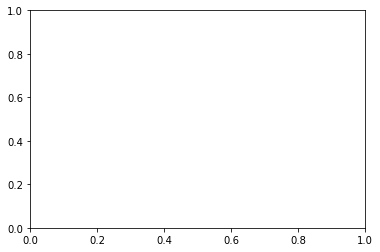

In [95]:
area = np.pi * ( X[:, 1])**2  
mpl.scatter(X[:, 1], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
#mpl.xlabel('X', fontsize=18)
#mpl.ylabel('Y', fontsize=16)
mpl.show()
